## Analise realizada para testar meus conhecimentos com uma base amostral de vendas de um Super Mercado

In [21]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

# Lendo o arquivo e transformando em DataFramee
df = pd.read_excel('Sample - Superstore.xlsx')


**Pergunta de Negócio 1:**

Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [187]:
# Possibilidade 01

# Realizado a filtragem da categoria desejada
pn1 = df[df['Category'] == 'Office Supplies']

# Realizado agrupamento mais soma do valor da venda para otimizar e facilitar e chegar no resultado
pn1 = pn1[['City','Sales']].groupby(['City']).sum(['Sales']).reset_index()

# Identificado o maior valor de venda entre as categorias Categoria d
pn1.sort_values('Sales', ascending=False).head(1)

,City,Sales
298,New York City,71361.006


**Pergunta de Negócio 2:**

Qual o Total de Vendas Por Data do Pedido?Demonstre o resultado através de um gráfico de barras.

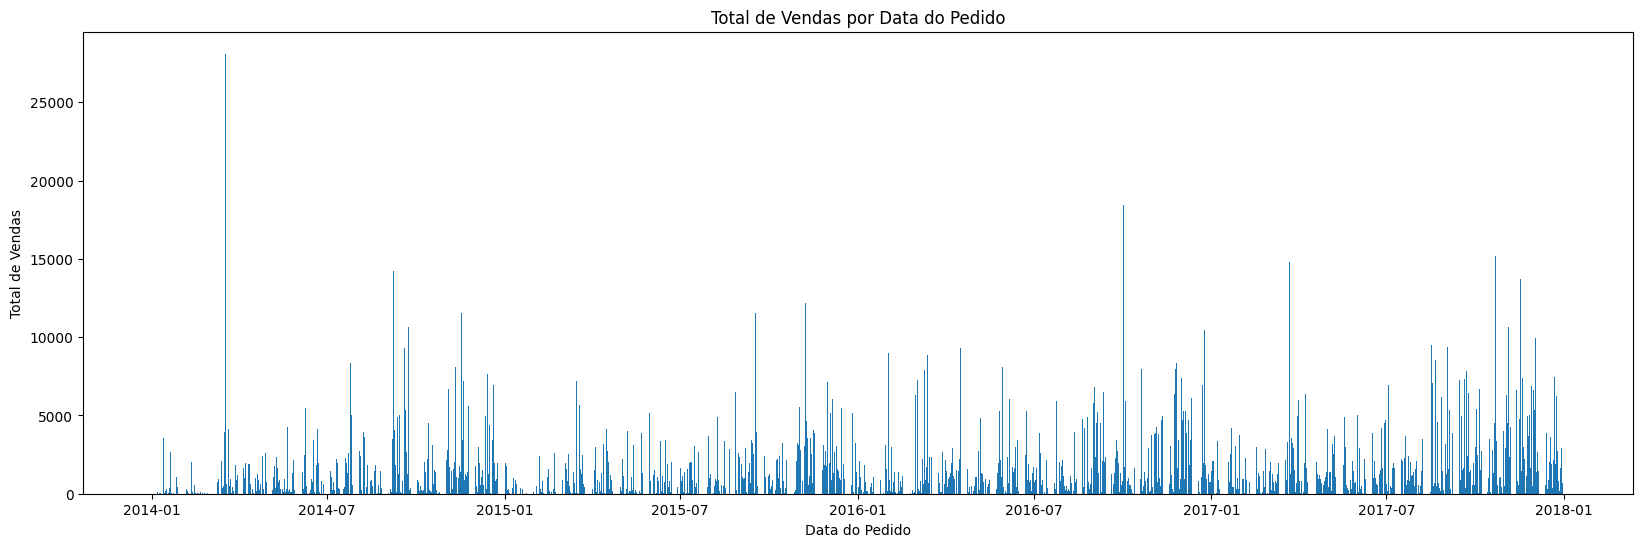

In [189]:
# Realizado agrupamento mais soma do valor da venda para otimizar e facilitar e chegar no resultado
pn2 = df[['Order Date','Sales']].groupby(['Order Date']).sum(['Sales']).reset_index()

# Cria o gráfico de barras (barras na vertical)
plt.figure(figsize=(20,6))
plt.bar(pn2['Order Date'], pn2['Sales'])

# Rotaciona os rótulos do eixo X para melhor visualização
#plt.xticks(rotation=90)

# Adiciona título e rótulos dos eixos
plt.title('Total de Vendas por Data do Pedido')
plt.xlabel('Data do Pedido')
plt.ylabel('Total de Vendas')

# Exibe o gráfico
plt.show()

**Pergunta de Negócio 3:**

Qual o Total de Vendas por Estado?Demonstre o resultado através de um gráfico de barras.


c:\Users\ezequ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ezequ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ezequ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


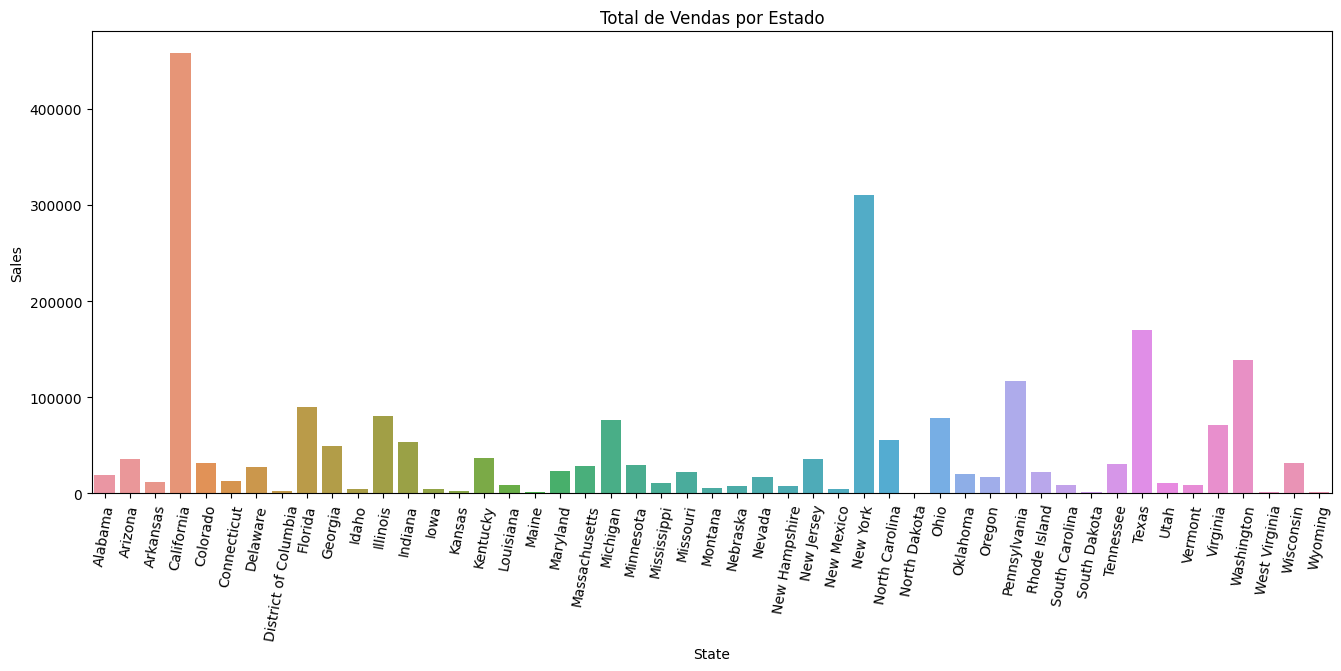

In [205]:
# Realizado agrupamento mais soma do valor da venda para otimizar e facilitar e chegar no resultado
pn3 = df[['State','Sales']].groupby(['State']).sum(['Sales']).reset_index()

# Ordena os dados do maior para o menor valor de vendas
#pn3 = pn3.sort_values(by='Sales', ascending=False)

# Cria o gráfico de barras (barras na vertical)
plt.figure(figsize=(16,6))
sea.barplot(data = pn3, 
            x = pn3['State'], 
            y = pn3['Sales']).set(title = 'Total de Vendas por Estado')

# Rotaciona os rótulos do eixo X para melhor visualização
plt.xticks(rotation=80)

# Exibe o gráfico
plt.show()

**Pergunta de Negócio 4:**

Quais São as 10 Cidades com Maior Total de Vendas?Demonstre o resultado através de um gráfico de barras.

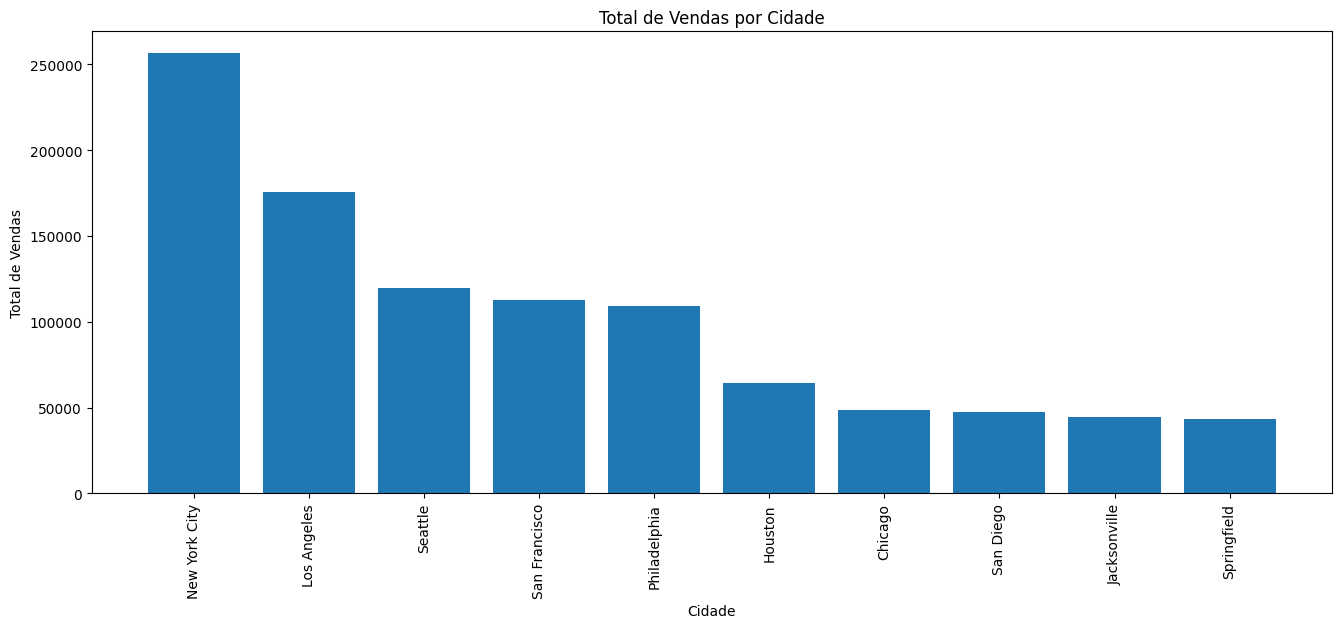

In [206]:
# Realizado agrupamento mais soma do valor da venda para otimizar e facilitar e chegar no resultado
pn4 = df[['City','Sales']].groupby(['City']).sum(['Sales']).reset_index()

# Ordena os dados do maior para o menor valor de vendas
pn4 = pn4.sort_values(by='Sales', ascending=False)

# Filtra os 10 estados com maiores valores de vendas
pn4 = pn4.head(10)

# Cria o gráfico de barras (barras na vertical)
plt.figure(figsize=(16,6))
plt.bar(pn4['City'], pn4['Sales'])

# Rotaciona os rótulos do eixo X para melhor visualização
plt.xticks(rotation=90)

# Adiciona título e rótulos dos eixos
plt.title('Total de Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

# Exibe o gráfico
plt.show()

**Pergunta de Negócio 5:**

Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [224]:
def autopct_format(values):
        def my_format(pct):
                total = sum(values)
                val = int(round(pct * total / 100.00))
                return '$ {v:d} '.format(v = val)
        return my_format

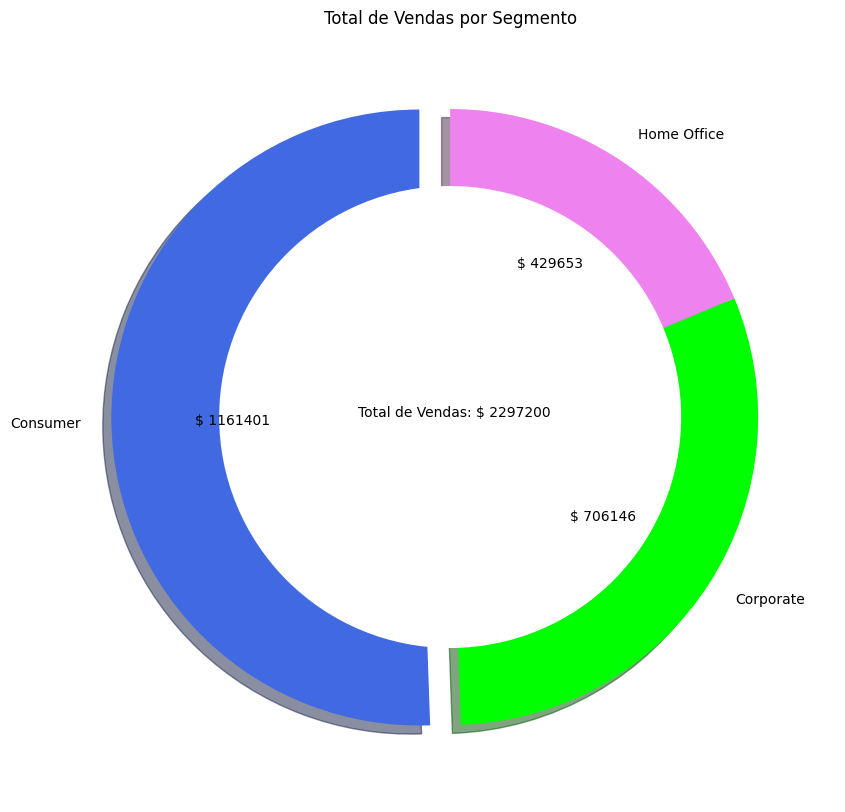

In [239]:
# Realizado agrupamento mais soma do valor da venda para otimizar e facilitar e chegar no resultado
pn5 = df[['Segment','Sales']].groupby(['Segment']).sum(['Sales']).reset_index()

# Criando Cores para colocar nos Segmentos
cores = ['royalblue', 'lime', 'violet']

# Cria o gráfico de Pizza
plt.figure(figsize=(20,10))
plt.pie(
        pn5['Sales'], # Definindo o volume de Dados 
        labels = pn5['Segment'], # Deinindo a legenda para os dados
        autopct= autopct_format(pn5['Sales']),
        colors = cores, # Definindo as cores para cada Legenda
        startangle = 90, # Defindo o Angulo da Pizza
        shadow = True, # Incluido Sombras ao gráficos
        explode = (0.1,0,0) # Definindo um parametro para da destaque na pizza
        )

# Limpando Circulo Central
centre_circle = plt.Circle((0,0),0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e Anotações
plt.annotate(text='Total de Vendas: '+'$ '+ str(int((sum(pn5['Sales'])))), xy=(-0.3,0))

# Adiciona título e rótulos dos eixos
plt.title('Total de Vendas por Segmento')

# Exibe o gráfico
plt.show()

**Pergunta de Negócio 6 (Desafio Nível Baby):**

Qual o Total de Vendas Por Segmento e Por Ano?

In [112]:
# Criando uma Coluna com Apenas o Ano do Pedido para trazer as informações solcitadas
df['Order Year'] = df['Order Date'].dt.year
# Realizado agrupamento mais soma do valor da venda para otimizar e facilitar e chegar no resultado
pn6 = df[['Segment','Order Year','Sales']].groupby(['Segment','Order Year']).sum(['Sales']).reset_index()

pn6

,Segment,Order Year,Sales
0,Consumer,2014,266096.8126
1,Consumer,2015,266535.9333
2,Consumer,2016,296863.8992
3,Consumer,2017,331904.6999
4,Corporate,2014,128434.8737
5,Corporate,2015,128757.3069
6,Corporate,2016,207106.3618
7,Corporate,2017,241847.8244
8,Home Office,2014,89715.8118
9,Home Office,2015,75239.2688


**Pergunta de Negócio 7 (Desafio Nível Júnior):**

Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:

Se o Valor_Venda for maior que 1000 recebe 15% de desconto. 

Se o Valor_Venda for menor que 1000 recebe 10% de desconto. 

Quantas Vendas Receberiam 15% de Desconto?

In [242]:
# Cria a Coluna Condicional com os valores de desconto
df['Desconto'] = np.where(df['Sales'] > 1000, 0.15, 0.10)

# Apresenta o resultado em quantidade de cada desconto
df['Desconto'].value_counts()


Desconto
0.10    9526
0.15     468
Name: count, dtype: int64

**Pergunta de Negócio 8 (Desafio Nível Master):**

Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [247]:
pn8 = df[df['Desconto'] == 0.15]

# Calculando a média das vendas Geral
print('Média Inicial antes do Desconto é igual á: ' ,round(pn8['Sales'].mean(),2))

# Aplicando o Desconto ao valor
pn8['Sales_Discont'] = pn8['Sales']-(pn8['Sales']*pn8['Desconto'])

print('Média após aplicação do Desconto é igual á: ' ,round(pn8['Sales_Discont'].mean(),2))

Média Inicial antes do Desconto é igual á:  2115.75
Média após aplicação do Desconto é igual á:  1798.38


C:\Users\ezequ\AppData\Local\Temp\ipykernel_8268\3721918132.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pn8['Sales_Discont'] = pn8['Sales']-(pn8['Sales']*pn8['Desconto'])


**Pergunta de Negócio 9 (Desafio Nível Master Ninja):**

Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

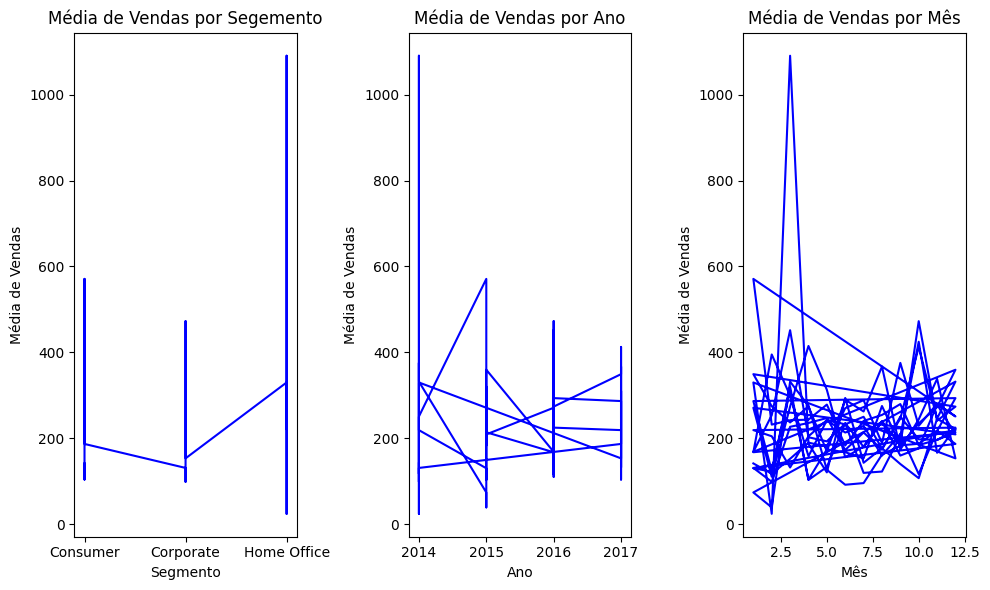

In [162]:
# Criando uma Coluna com Apenas o Ano do Pedido para trazer as informações solcitadas
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
# Realizado agrupamento mais soma do valor da venda para otimizar e facilitar e chegar no resultado
pn9 = df[['Segment','Order Year','Order Month','Sales']].groupby(['Segment','Order Year','Order Month']).mean(['Sales']).reset_index()

# Definindo os titulos de cada gráfico
Titulos = ['Média de Vendas por Segemento','Média de Vendas por Ano','Média de Vendas por Mês']

# Definindo as legendas de cada gráfico
x_legenda = ['Segmento', 'Ano' , 'Mês']

# Definindo os Dados do eixo X de cada gráfico
x = [pn9['Segment'],pn9['Order Year'],pn9['Order Month']]

# Definindo o Eixo y
y = pn9['Sales']

# Divide a área de plotagem em dois subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(10,6))

# Indice para Loop
i = 0

# Loop pelos eixos para criar cada plot
for ax in axes:
    ax.plot(x[i], y, 'b')
    ax.set_xlabel(x_legenda[i])
    ax.set_ylabel('Média de Vendas')
    ax.set_title(Titulos[i])
    i = i +1
    
# Ajusta o layout
fig.tight_layout()

**Solução do professo**

In [262]:
# Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação
df_dsa_p9 = df.groupby(['Order Year', 'Order Month', 'Segment'])['Sales'].agg([np.sum, np.mean, np.median])

C:\Users\ezequ\AppData\Local\Temp\ipykernel_8268\17928168.py:2: FutureWarning: The provided callable <function sum at 0x000001F9975ED260> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_dsa_p9 = df.groupby(['Order Year', 'Order Month', 'Segment'])['Sales'].agg([np.sum, np.mean, np.median])
C:\Users\ezequ\AppData\Local\Temp\ipykernel_8268\17928168.py:2: FutureWarning: The provided callable <function mean at 0x000001F9975EE340> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_dsa_p9 = df.groupby(['Order Year', 'Order Month', 'Segment'])['Sales'].agg([np.sum, np.mean, np.median])
C:\Users\ezequ\AppData\Local\Temp\ipykernel_8268\17928168.py:2: FutureWarning: The provided callable <function median at 0x000001F997719620> is currently using S

In [258]:
# Vamos extrair os níveis
anos = df_dsa_p9.index.get_level_values(0)
meses = df_dsa_p9.index.get_level_values(1)
segmentos = df_dsa_p9.index.get_level_values(2)

c:\Users\ezequ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ezequ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ezequ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ezequ\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Figure size 1200x600 with 0 Axes>

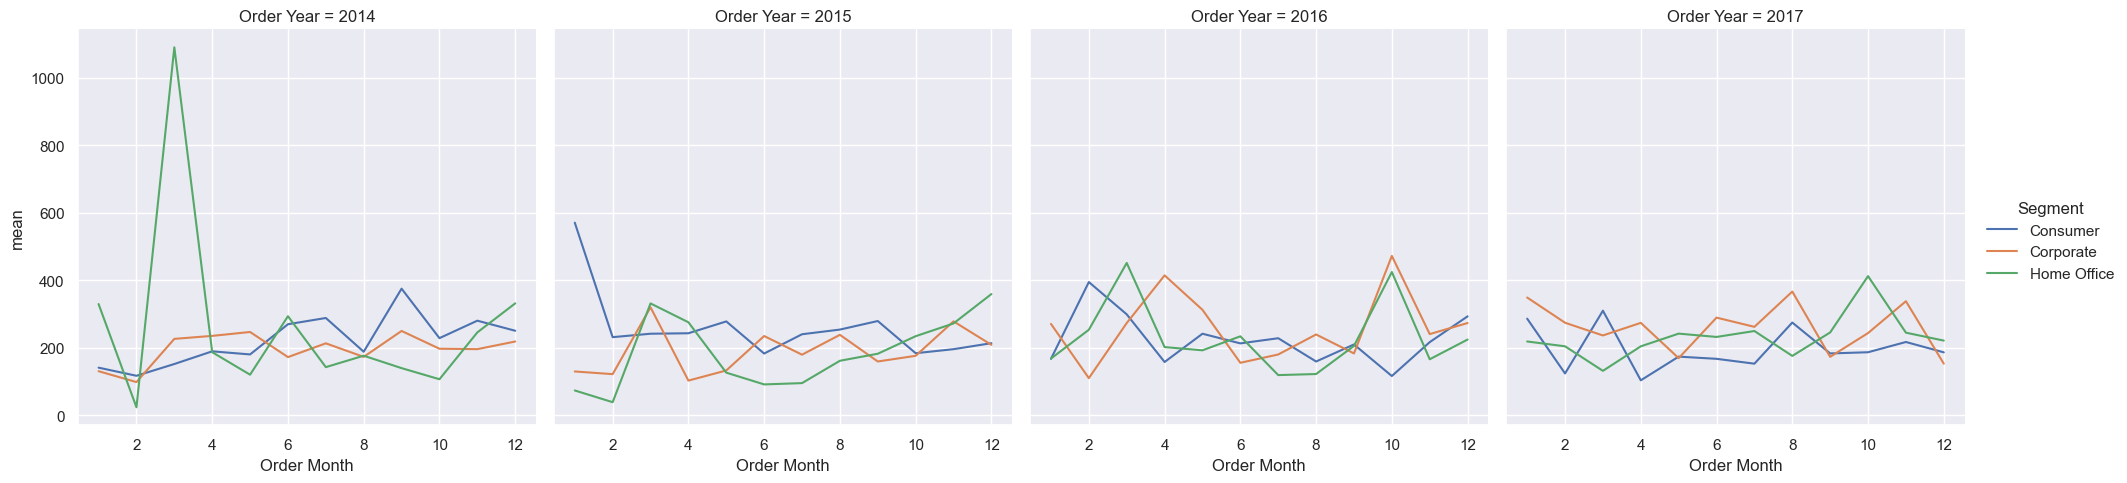

In [260]:
# Plot
plt.figure(figsize = (12, 6))
sea.set()
fig1 = sea.relplot(kind = 'line',
                   data = df_dsa_p9, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

**Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):**

Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

Demonstre tudo através de um único gráfico

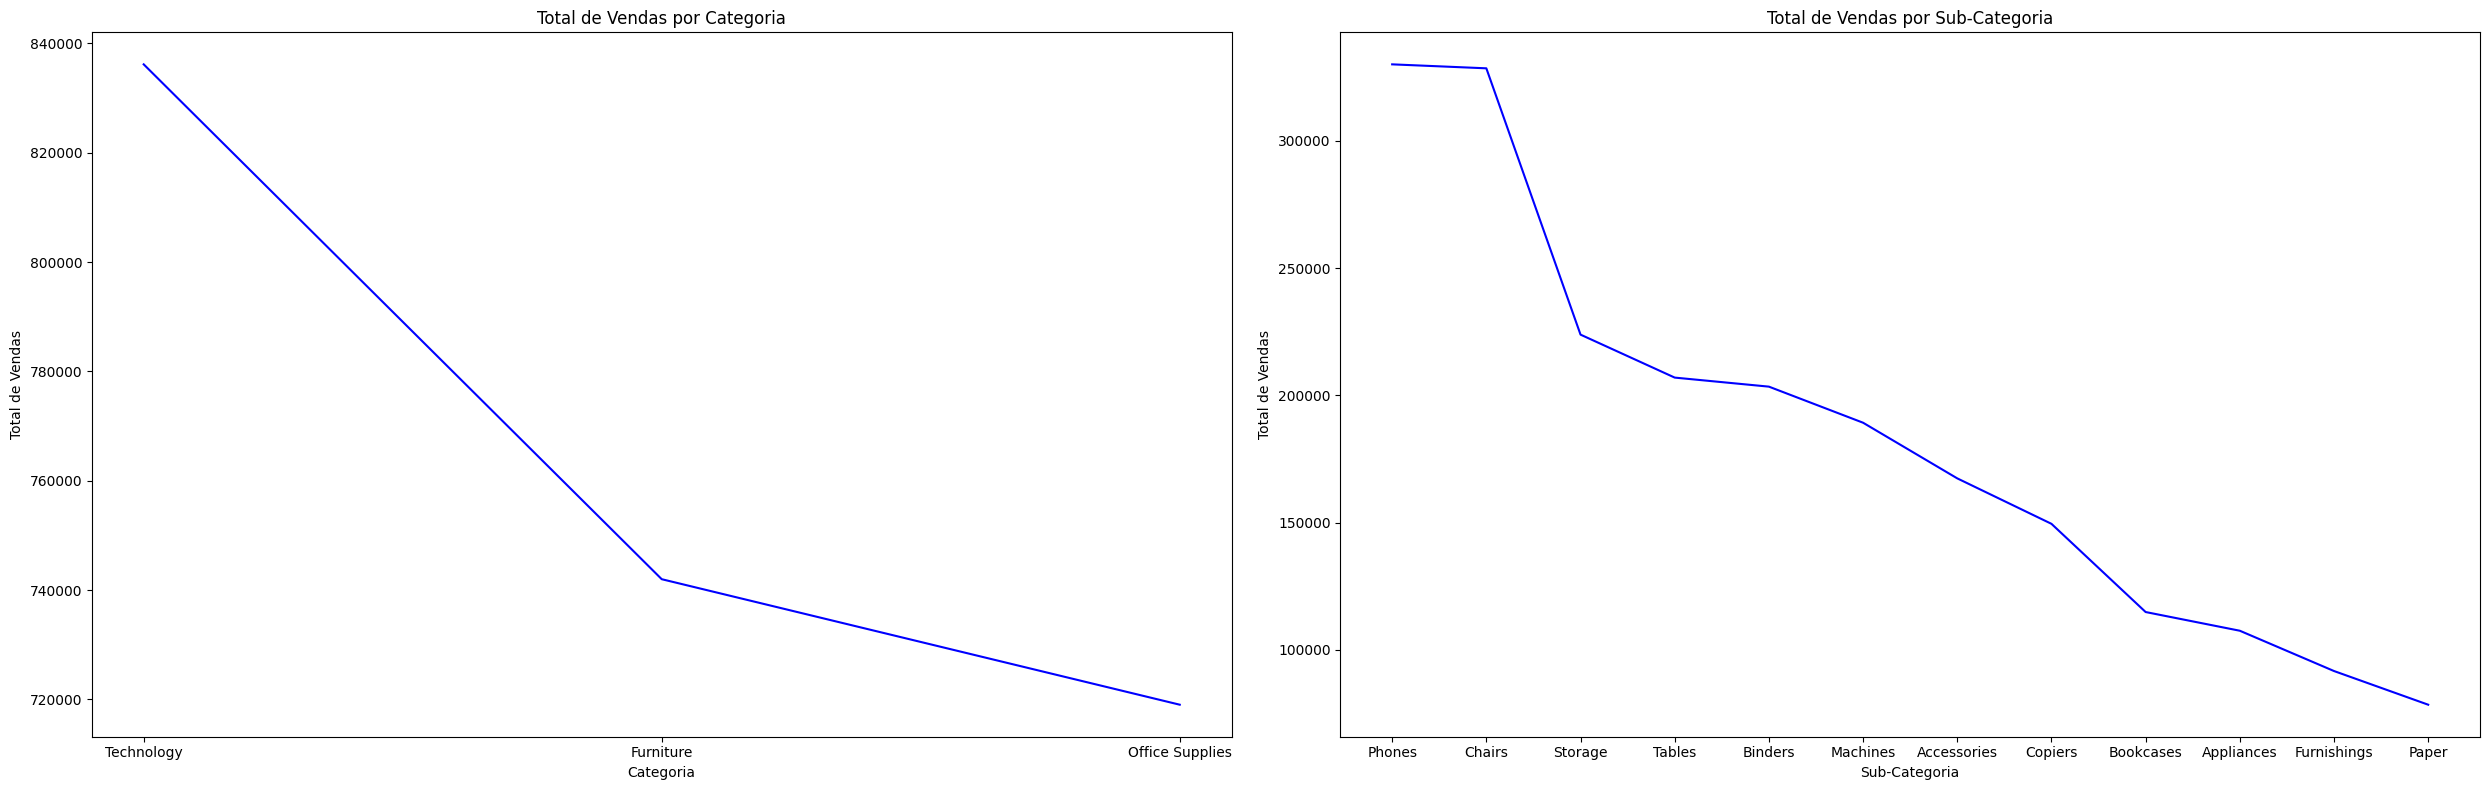

In [173]:
# Realizado agrupamento mais soma do valor da venda para otimizar e facilitar e chegar no resultado
Pn10_Categoria = df[['Category','Sales']].groupby(['Category']).sum(['Sales']).reset_index()
Pn10_Sub_Categoria = df[['Sub-Category','Sales']].groupby(['Sub-Category']).sum(['Sales']).reset_index()

# Ordena os dados do maior para o menor valor de vendas
Pn10_Categoria = Pn10_Categoria.sort_values(by='Sales', ascending=False)
Pn10_Sub_Categoria = Pn10_Sub_Categoria.sort_values(by='Sales', ascending=False)

Pn10_Sub_Categoria = Pn10_Sub_Categoria.head(12)

# Definindo os titulos de cada gráfico
Titulos = ['Total de Vendas por Categoria','Total de Vendas por Sub-Categoria']

# Definindo as legendas de cada gráfico
x_legenda = ['Categoria' , 'Sub-Categoria']

# Definindo os Dados do eixo X de cada gráfico
x = [Pn10_Categoria['Category'],Pn10_Sub_Categoria['Sub-Category']]

# Definindo o Eixo y
y = [Pn10_Categoria['Sales'],Pn10_Sub_Categoria['Sales']]

# Divide a área de plotagem em dois subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(25,8))

# Indice para Loop
i = 0
# Loop pelos eixos para criar cada plot
for ax in axes:
    ax.plot(x[i], y[i], 'b')
    ax.set_xlabel(x_legenda[i])
    ax.set_ylabel('Total de Vendas')
    ax.set_title(Titulos[i])
    #ax.xticks(rotation=90)
    i = i +1
    
# Ajusta o layout
fig.tight_layout()


**Solução Do professor**

In [252]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
df_dsa_p10 = df.groupby(['Category',
                             'Sub-Category']).sum(numeric_only = True).sort_values('Sales',
                                                                                   ascending = False).head(12)
                             
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_dsa_p10 = df_dsa_p10[['Sales']].astype(int).sort_values(by = 'Category').reset_index()

# Criamos outro dataframe somente com os totais por categoria
df_dsa_p10_cat = df_dsa_p10.groupby('Category').sum(numeric_only = True).reset_index()

In [253]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [254]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

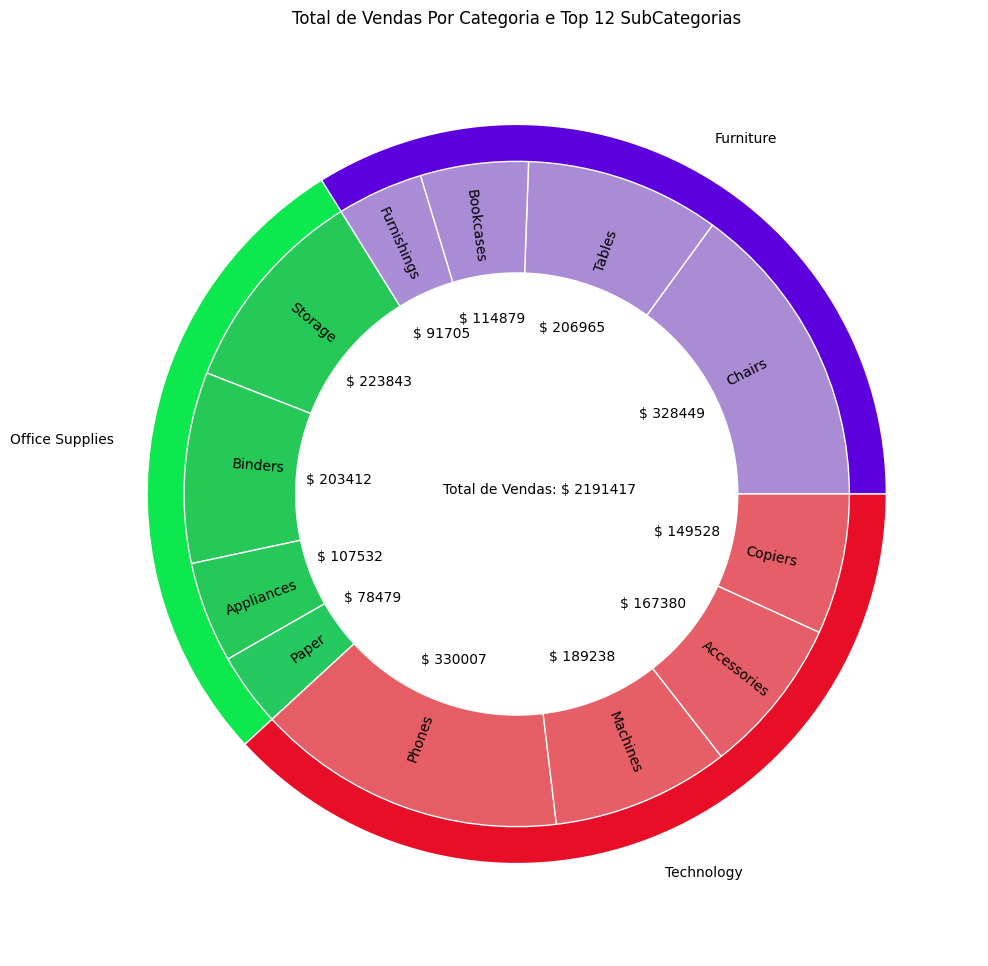

In [256]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_dsa_p10_cat['Sales'], 
            radius = 1,
            labels = df_dsa_p10_cat['Category'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa_p10['Sales'],
            radius = 0.9,
            labels = df_dsa_p10['Sub-Category'],
            autopct = autopct_format(df_dsa_p10['Sales']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p10['Sales']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()